# MNISTでの機械学習ハンズオン

Pythonのよく使われている機械学習を行います。

MNISTはチュートリアルで用いられる手書き文字データセットのことです。

## Kerasで多層パーセプトロン（Multi-Layer Perceptron, MLP）を組んで手書き文字を判別してみよう

※このパートはPyDataOkinawa 第16回の資料を参考にしています

これはNNと呼ばれる技術です。

色々派生した技術がありますが、大本の技術から触っていこうかなと思います。

機械学習をするだけなら、機械学習の知識についてよく知ってる上で、

フレームワークがどのような動きをするかどうかを知ることが大事です。

## モデルの構築 

In [82]:
## 必要なフレームワークのインストール
# !pip install -y keras
# !conda install tensorflow

In [83]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [93]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [94]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [135]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
# model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))


## モデルの可視化

In [136]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [137]:
# !pip install pydotplus
# !pip install pydot

In [138]:
import pydot

In [139]:
import pydotplus
from keras.utils.vis_utils import model_to_dot
import keras
keras.utils.vis_utils.pydot = pydot

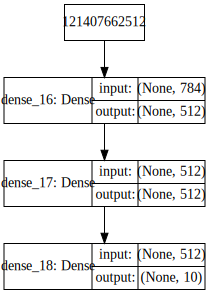

In [140]:
# モデルの可視化用モジュールの読み込み
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot ## 命名変更されてます

# モデルの可視化
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [141]:
batch_size = 128
num_classes = 10
epochs = 5

In [142]:
x_train = x_train.reshape(60000, 784) # 2次元配列を1次元に変換
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')   # int型をfloat32型に変換
x_test = x_test.astype('float32')
x_train /= 255                        # [0-255]の値を[0.0-1.0]に変換
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [143]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## モデルのコンパイル
+ 最適化手法の選択
    + 通常はAdadeltaかAdam、もしくはSGD with Nesterov momentumでOK
    + RNNならRMSpropが安定している
    + 超複雑なネットワークを、大量のデータで学習させるときには極力小さな学習率でシンプルなSGD without momentumを用いるのが良かったりする。（validation errorの減少が止まったら学習率を半分にする）

In [144]:
# ==== デフォルト設定で使う場合 ====
# optimizerに全て小文字のストリングを渡すだけ（超カンタン！）
# 例えば以下のような設定が使える
# optimizer='sgd'
# optimizer='adadelta'
# optimizer='adam'
# optimizer='rmsprop

# ==== 好みに合わせて設定を変えたい場合 ====
# まず、最適化手法のクラスを読み込む
from keras.optimizers import SGD, Adadelta, Adam, RMSprop
# それらをインスタンス化してからoptimizer引数に渡す
# 例）　SGD with Nesterov momentum を用いる場合
sgd_nesterov=SGD(lr=0.01, momentum=0.9, nesterov=True)

# モデルのコンパイル
model.compile(loss='categorical_crossentropy', # 損失関数（この量のパラメータ勾配で学習する）
              optimizer='sgd', # 最適化手法（デフォルト設定）
              #optimizer='rmsprop', # 最適化手法（デフォルト設定）
              #optimizer=sgd_nesterov, # 最適化手法（お好み設定）
              metrics=['accuracy'] # 評価指標
             )

## モデルの保存

In [145]:
# JSON形式でモデルを保存
json_string = model.to_json()
open('./mnist_mlp_model.json', 'w').write(json_string)

1551

In [146]:
# YAML形式でモデルを保存
yaml_string = model.to_yaml()
open('./mnist_mlp_model.yaml', 'w').write(yaml_string)

1532

## パラメータの保存

In [147]:
#　初期ウエイトの保存
model.save_weights('./mnist_mlp_init_weight.hdf5', overwrite=True)

## モデルの読み出し

In [148]:
from keras.models import model_from_json, model_from_yaml

In [149]:
# JSON形式で保存されたモデルの呼び出し
#json_string = open('./mnist_mlp_model.json', 'r').read()
#model = model_from_json(json_string)

In [150]:
# YAML形式で保存されたモデルの呼び出し
#yaml_string = open('./mnist_mlp_model.yaml', 'r').read()
#model = model_from_yaml(yaml_string)

## パラメータの読み出し

In [151]:
#model.load_weights('./mnist_mlp_init_weight.hdf5')


## MNISTデータセットの読み込み

In [152]:
from keras.datasets import mnist

In [153]:
# 手書き文字データセット（MNIST）の読み込み
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## データの可視化

In [154]:
# 可視化用ライブラリの読み込み
%matplotlib inline
import matplotlib.pyplot as plt

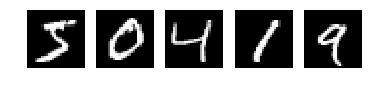

In [155]:
# 入力データを可視化（最初の５文字）
fig, ax = plt.subplots(1, 5)

for ii in range(5):
    ax[ii].imshow(X_train[ii], cmap='gray')
    ax[ii].axis('off')

## データの前処理

In [156]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


60000 train samples
10000 test samples


In [157]:
from keras.utils import np_utils

In [158]:
nb_classes = 10

In [159]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [160]:
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [161]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

## 学習

In [162]:
# TensorBoardで学習の進捗状況をみる
tb_cb = keras.callbacks.TensorBoard(log_dir='/tmp/keras_mnist_mlp', histogram_freq=1)

# バリデーションロスが下がれば、エポックごとにモデルを保存
cp_cb = keras.callbacks.ModelCheckpoint(filepath='./mnist_mlp_best_weight.hdf5', 
                                        monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# バリデーションロスが５エポック連続で上がったら、ランを打ち切る
es_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')

cbks = [tb_cb, cp_cb, es_cb]

In [163]:
import time

In [164]:
tic = time.time()

# 学習を実行
# 学習途中の損失関数の値などはhistory.historyに保存される。
history = model.fit(X_train, Y_train,   # 画像とラベルデータ
                    batch_size=128, 
                    nb_epoch=20,    # エポック数の指定
                    verbose=0,     # ログ出力の指定. 0だとログが出ない
                    validation_data=(X_test, Y_test),
                    callbacks=cbks)

toc = time.time()

# 学習にかかった時間を表示
print("Execution time: {0:.2f} [sec]".format(toc - tic))

/Users/bouch/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


InvalidArgumentError: You must feed a value for placeholder tensor 'dense_1_input' with dtype float and shape [?,784]
	 [[Node: dense_1_input = Placeholder[dtype=DT_FLOAT, shape=[?,784], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'dense_1_input', defined at:
  File "/Users/bouch/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/bouch/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 456, in _handle_events
    self._handle_recv()
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 486, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 438, in _run_callback
    callback(*args, **kwargs)
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2665, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2788, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2904, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2964, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-a6f4835e64db>", line 2, in <module>
    model.add(Dense(512, activation='relu', input_shape=(784,)))
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/keras/engine/sequential.py", line 162, in add
    name=layer.name + '_input')
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/keras/engine/input_layer.py", line 176, in Input
    input_tensor=tensor)
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/keras/engine/input_layer.py", line 85, in __init__
    name=self.name)
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 514, in placeholder
    x = tf.placeholder(dtype, shape=shape, name=name)
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1808, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 4848, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/Users/bouch/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'dense_1_input' with dtype float and shape [?,784]
	 [[Node: dense_1_input = Placeholder[dtype=DT_FLOAT, shape=[?,784], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


## ベストなパラメータの呼び出し

In [66]:
model.load_weights('./mnist_mlp_best_weight.hdf5')

## 学習結果の評価

In [67]:
# テストデータに対する評価値
score = model.evaluate(X_test, Y_test, verbose=0)

In [68]:
print('Test score:', score[0]) # 損失関数の値
print('Test accuracy:', score[1]) # 精度

Test score: 0.14613042592331768
Test accuracy: 0.9564


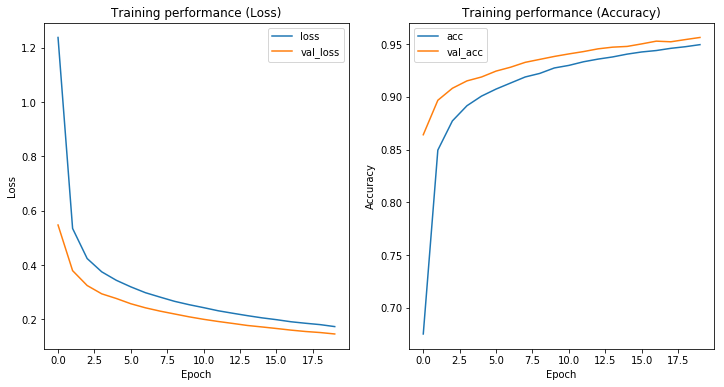

In [69]:
# 学習曲線
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('Training performance (Loss)')
ax[0].plot(history.epoch, history.history['loss'], label='loss')
ax[0].plot(history.epoch, history.history['val_loss'], label='val_loss')
ax[0].set(xlabel='Epoch', ylabel='Loss')
ax[0].legend()

ax[1].set_title('Training performance (Accuracy)')
ax[1].plot(history.epoch, history.history['acc'], label='acc')
ax[1].plot(history.epoch, history.history['val_acc'], label='val_acc')
ax[1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1].legend(loc='best')

In [70]:
# 予測値
Y_test_pred = model.predict(X_test)

In [71]:
# 予測の形
Y_test_pred.shape

(10000, 10)

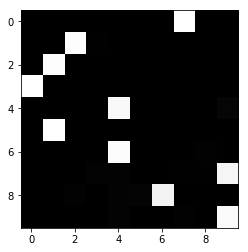

In [72]:
# 予測の可視化
plt.imshow(Y_test_pred[:10], cmap='gray', interpolation='nearest', vmin=0, vmax=1)

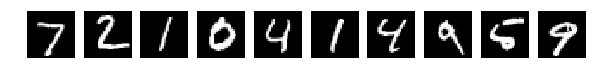

In [73]:
# 入力データを可視化（最初の10文字）
fig, ax = plt.subplots(1, 10, figsize=(10, 2))

for ii in range(10):
    ax[ii].imshow(X_test[ii].reshape(28, 28), cmap='gray')
    ax[ii].axis('off')

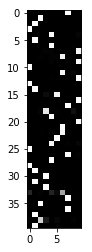

In [74]:
plt.imshow(Y_test_pred[:40], cmap='gray', interpolation='nearest', vmin=0, vmax=1)

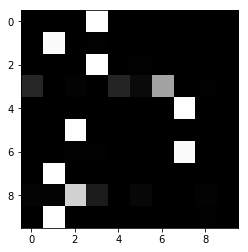

In [75]:
# 予測の可視化
plt.imshow(Y_test_pred[30:40], cmap='gray', interpolation='nearest', vmin=0, vmax=1)

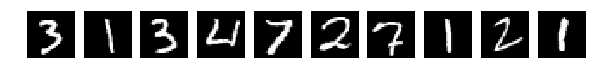

In [76]:
# 入力データを可視化（30~39文字目までの10文字）
fig, ax = plt.subplots(1, 10, figsize=(10, 2))

for ii in range(10):
    ax[ii].imshow(X_test[ii+30].reshape(28, 28), cmap='gray')
    ax[ii].axis('off')